In [1]:
import torch
import numpy as np
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [2]:
n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [3]:
len(X),len(y)

(1000, 1000)

In [4]:
print(X[:5])

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]


In [5]:
df = pd.DataFrame({"X1":X[:,0], "X2":X[:,1],"y":y})

In [6]:
df.head()

,X1,X2,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


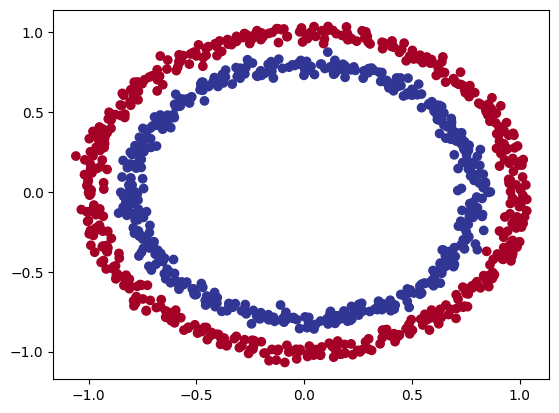

In [7]:
plt.scatter(x=X[:,0], y=X[:,1], c=y,cmap=plt.cm.RdYlBu)

In [8]:
type(X)

numpy.ndarray

In [9]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [10]:
X.dtype,y.dtype

(torch.float32, torch.float32)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)

In [12]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [13]:
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [14]:
class Classification_0 (nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features= 2,out_features= 10)
        self.layer_2=nn.Linear(in_features= 10, out_features= 15)
        self.layer_3=nn.Linear(in_features= 15, out_features= 1)
        self.relu = nn.ReLU()
    
    def forward (self, x:torch.tensor):
        return self.layer_3(self.relu(self.layer_2(self.relu((self.layer_1(x))))))
model_0 = Classification_0().to(device=device)
model_0

Classification_0(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=15, bias=True)
  (layer_3): Linear(in_features=15, out_features=1, bias=True)
  (relu): ReLU()
)

In [15]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [16]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.3523, -0.0340],
                      [ 0.2662,  0.6427],
                      [-0.6982,  0.2680],
                      [ 0.3567, -0.2738],
                      [-0.1936, -0.0373],
                      [-0.1078,  0.4056],
                      [-0.2274,  0.5263],
                      [-0.0982, -0.5947],
                      [-0.6647, -0.2157],
                      [-0.2293, -0.5302]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.6532,  0.3891, -0.4693, -0.3174, -0.0368,  0.3025,  0.0732, -0.3193,
                       0.5366,  0.1198], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.0905,  0.1380, -0.1907, -0.0335, -0.1227, -0.2544,  0.2008,  0.0270,
                        0.0968, -0.0401],
                      [-0.0549, -0.2685,  0.0457, -0.1114,  0.0036,  0.2704, -0.1179,  0.1327,
                        0.0729, -0.3058],
                      [-0.0680,  0.230

In [17]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1, weight_decay=1e-4)

In [18]:
def accuracy(y_true ,y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

In [19]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=1000

for epoch in range(epochs):
    model_0.train()
    y_logits= model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    loss = loss_fn(y_logits, y_train)
    acc = accuracy(y_true=y_train, y_pred=y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()
  
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        y_loss_test = loss_fn(test_logits, y_test)
        test_acc = accuracy(y_true=y_test, y_pred=test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc: .2f}% | Test loss: {y_loss_test:.5f}, Test acc: {test_acc:.2f}")

Epoch: 0 | Loss: 0.69275, Acc:  50.00% | Test loss: 0.69355, Test acc: 50.00
Epoch: 10 | Loss: 0.69132, Acc:  50.00% | Test loss: 0.69224, Test acc: 50.00
Epoch: 20 | Loss: 0.69055, Acc:  50.00% | Test loss: 0.69177, Test acc: 50.00
Epoch: 30 | Loss: 0.69027, Acc:  56.62% | Test loss: 0.69163, Test acc: 54.50
Epoch: 40 | Loss: 0.69004, Acc:  54.37% | Test loss: 0.69152, Test acc: 54.50
Epoch: 50 | Loss: 0.68983, Acc:  58.75% | Test loss: 0.69142, Test acc: 60.00
Epoch: 60 | Loss: 0.68961, Acc:  62.38% | Test loss: 0.69132, Test acc: 60.50
Epoch: 70 | Loss: 0.68939, Acc:  63.38% | Test loss: 0.69121, Test acc: 59.00
Epoch: 80 | Loss: 0.68916, Acc:  63.12% | Test loss: 0.69110, Test acc: 58.50
Epoch: 90 | Loss: 0.68893, Acc:  62.88% | Test loss: 0.69098, Test acc: 58.50
Epoch: 100 | Loss: 0.68870, Acc:  63.00% | Test loss: 0.69086, Test acc: 58.50
Epoch: 110 | Loss: 0.68845, Acc:  62.50% | Test loss: 0.69073, Test acc: 59.50
Epoch: 120 | Loss: 0.68820, Acc:  62.75% | Test loss: 0.69058, 

In [20]:
y_logits.device

device(type='cuda', index=0)

In [21]:
model_0.eval()
  
with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    y_loss_test = loss_fn(test_logits, y_test)
    test_acc = accuracy(y_true=y_test, y_pred=test_pred)
    print(f"Test loss: {y_loss_test:.5f}, Test acc: {test_acc:.2f}")

Test loss: 0.28783, Test acc: 99.00


In [22]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

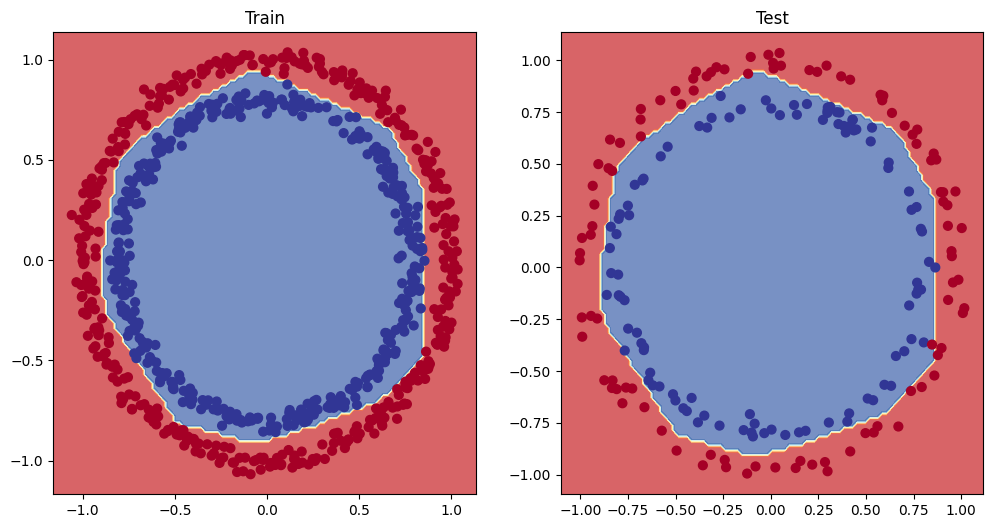

In [23]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model=model_0,X=X_train,y = y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

In [25]:
import os
os.makedirs(r"C:\Users\Ahmad\Desktop\Project\Pytorch\Pytorch Workflow\Classification", exist_ok=True)
torch.save(obj=model_0.state_dict(), f=r"C:\Users\Ahmad\Desktop\Project\Pytorch\Pytorch Workflow\Classification\model_Classification_1_state_dict.pth")
